<a href="https://colab.research.google.com/github/nblaustein/Ds-2002---Nicole-Blaustein-/blob/main/DS_2002_Project_2_Part_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:

#creating the sql database
import sqlite3
# Connect to the SQLite database
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS mytable (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        factor_value FLOAT,
        pi_value FLOAT,
        timestamp TEXT
    )
''')

# Commit the changes
conn.commit()


In [3]:
pip install schedule

In [16]:
import requests
import schedule
import sqlite3

import time
from datetime import datetime
# Function to retrieve data from the remote API and store it in the database
def fetch_and_store_data():
    api_endpoint = 'https://4feaquhyai.execute-api.us-east-1.amazonaws.com/api/pi'
    try:
        # Make a request to the remote API
        response = requests.get(api_endpoint)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the response JSON and extract relevant data
            api_data = response.json()
            factor_value = api_data['factor']
            pi_value = api_data['pi']
            timestamp = api_data['time']

            # Connect to the SQLite database
            conn = sqlite3.connect('mydatabase.db')
            cursor = conn.cursor()

            # Insert the data into the database
            cursor.execute("INSERT INTO mytable (factor_value, pi_value, timestamp) VALUES (?, ?, ?)",
                           (factor_value, pi_value, timestamp))

            # Commit the changes and close the database connection
            conn.commit()
            conn.close()

            print("Data successfully retrieved and stored at", datetime.now())
        else:
            print("Failed to retrieve data. Status code:", response.status_code)
    except Exception as e:
        print("An error occurred:", str(e))

# Function to calculate the next execution time
def time_until_next_execution():
    now = datetime.now()
    next_execution = datetime(now.year, now.month, now.day, now.hour, now.minute) + timedelta(minutes=1)
    return (next_execution - now).total_seconds()

# Initialize the last timestamp to the current time
last_timestamp = datetime.now()

# Run the scheduled task for 60 minutes
for _ in range(60):
    # Calculate the time until the next execution
    time_to_sleep = time_until_next_execution()

    # Ensure that we don't sleep for negative time
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

    # Run the task
    fetch_and_store_data()


Data successfully retrieved and stored at 2023-11-29 18:27:00.277059
Data successfully retrieved and stored at 2023-11-29 18:28:00.276012
Data successfully retrieved and stored at 2023-11-29 18:29:00.279321
Data successfully retrieved and stored at 2023-11-29 18:30:00.375473
Data successfully retrieved and stored at 2023-11-29 18:31:00.457506
Data successfully retrieved and stored at 2023-11-29 18:32:00.292531
Data successfully retrieved and stored at 2023-11-29 18:33:00.395841
Data successfully retrieved and stored at 2023-11-29 18:34:00.396570
Data successfully retrieved and stored at 2023-11-29 18:35:00.318333
Data successfully retrieved and stored at 2023-11-29 18:36:00.400810
Data successfully retrieved and stored at 2023-11-29 18:37:00.339620
Data successfully retrieved and stored at 2023-11-29 18:38:00.381857
Data successfully retrieved and stored at 2023-11-29 18:39:00.416593
Data successfully retrieved and stored at 2023-11-29 18:40:00.342774
Data successfully retrieved and st

In [33]:
# Connect to the SQLite database and select all rows in the table
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM mytable")

rows = cursor.fetchall()

# Print the results
for row in rows:
    print(row)

(1, 19683.0, 3.1416434588531876, '2023-11-29 18:27:00')
(2, 21952.0, 3.141547099653953, '2023-11-29 18:28:00')
(3, 24389.0, 3.1416336556808755, '2023-11-29 18:29:00')
(4, 27000.0, 3.1415556165527665, '2023-11-29 18:30:00')
(5, 29791.0, 3.1416262207744947, '2023-11-29 18:31:00')
(6, 32768.0, 3.1415621360116797, '2023-11-29 18:32:00')
(7, 35937.0, 3.1416204800638963, '2023-11-29 18:33:00')
(8, 39304.0, 3.141567210886769, '2023-11-29 18:34:00')
(9, 42875.0, 3.1416159772049452, '2023-11-29 18:35:00')
(10, 46656.0, 3.1415712201192867, '2023-11-29 18:36:00')
(11, 50653.0, 3.141612395757074, '2023-11-29 18:37:00')
(12, 54872.0, 3.1415744293588412, '2023-11-29 18:38:00')
(13, 59319.0, 3.141609511594793, '2023-11-29 18:39:00')
(14, 64000.0, 3.141577028589768, '2023-11-29 18:40:00')
(15, 68921.0, 3.141607162955563, '2023-11-29 18:41:00')
(16, 74088.0, 3.1415791561272712, '2023-11-29 18:42:00')
(17, 79507.0, 3.141605231098648, '2023-11-29 18:43:00')
(18, 85184.0, 3.1415809142959636, '2023-11-29 1

In [25]:
#Find the percent change of values from each consecuative row
query =   """
SELECT
    t1.id,
    (t1.factor_value - COALESCE(t2.factor_value, t1.factor_value)) / COALESCE(t2.factor_value, t1.factor_value) * 100 AS percent_change_value1,
    (t1.pi_value - COALESCE(t2.pi_value, t1.pi_value)) / COALESCE(t2.pi_value, t1.pi_value) * 100 AS percent_change_value2,
    t1.timestamp
FROM
   mytable t1
LEFT JOIN
    mytable t2 ON t1.id = t2.id + 1
ORDER BY
    t1.timestamp;
      """
cursor.execute(query)
results = cursor.fetchall()

for row in results:
  print(row)

(1, 0.0, 0.0, '2023-11-29 18:27:00')
(2, 11.527714271198496, -0.0030671589725725, '2023-11-29 18:28:00')
(3, 11.10149416909621, 0.0027552038590109764, '2023-11-29 18:29:00')
(4, 10.705645987945385, -0.0024840301786264274, '2023-11-29 18:30:00')
(5, 10.337037037037037, 0.002247428673750335, '2023-11-29 18:31:00')
(6, 9.992950891208755, -0.0020398595603538907, '2023-11-29 18:32:00')
(7, 9.6710205078125, 0.0018571669026631967, '2023-11-29 18:33:00')
(8, 9.36917383198375, -0.0016955955522046312, '2023-11-29 18:34:00')
(9, 9.08558925300224, 0.0015522926903196576, '2023-11-29 18:35:00')
(10, 8.81865889212828, -0.0014246517073790155, '2023-11-29 18:36:00')
(11, 8.56695816186557, 0.0013106701997931919, '2023-11-29 18:37:00')
(12, 8.329220381813515, -0.0012085003956602593, '2023-11-29 18:38:00')
(13, 8.104315497885988, 0.0011167087312648238, '2023-11-29 18:39:00')
(14, 7.8912321515871815, -0.001033960614933568, '2023-11-29 18:40:00')
(15, 7.6890625, 0.0009592114253590152, '2023-11-29 18:41:00')

For factor values, at first the percent change from each row slowly decreases and then at the 34th minute, the percent change goes negative and at the 36th minute it jumps all the way to 700%. After that, the percent change decreases pretty steadily again until the end. For the pi values, the percent change from each consecutive row is very small and pretty similar throughout the entire hour except for at the 34th and 36th minute where the percent change jumps up pretty high. An interesting pattern is that for almost every row, the percent change alternates from a positive percent change to a negative one.

In [32]:
#Find rows with max and min factor and pi values

query = """
WITH RankedData AS (
    SELECT
        id,
        factor_value,
        pi_value,
        timestamp,
        ROW_NUMBER() OVER (ORDER BY factor_value DESC) AS factor_value_rank_desc,
        ROW_NUMBER() OVER (ORDER BY pi_value DESC) AS pi_value_rank_desc,
        ROW_NUMBER() OVER (ORDER BY factor_value ASC) AS factor_value_rank_asc,
        ROW_NUMBER() OVER (ORDER BY pi_value ASC) AS pi_value_rank_asc
    FROM
        mytable
)
SELECT
    id,
    factor_value,
    pi_value,
    timestamp,
    CASE WHEN factor_value_rank_desc = 1 THEN 'MaxFactorValue' END AS max_factor_value_label,
    CASE WHEN pi_value_rank_desc = 1 THEN 'MaxPiValue' END AS max_pi_value_label,
    CASE WHEN factor_value_rank_asc = 1 THEN 'MinFactorValue' END AS min_factor_value_label,
    CASE WHEN pi_value_rank_asc = 1 THEN 'MinPiValue' END AS min_pi_value_label
FROM
    RankedData
WHERE
    factor_value_rank_desc = 1
    OR pi_value_rank_desc = 1
    OR factor_value_rank_asc = 1
    OR pi_value_rank_asc = 1;
"""
cursor.execute(query)
results = cursor.fetchall()

for row in results:
  print(row)



(33, 205379.0, 3.141597522636734, '2023-11-29 18:59:00', 'MaxFactorValue', None, None, None)
(36, 8.0, 3.017071817071818, '2023-11-29 19:02:00', None, None, None, 'MinPiValue')
(34, 1.0, 4.0, '2023-11-29 19:00:00', None, 'MaxPiValue', 'MinFactorValue', None)


I created this query to take a look at the rows with the min and max factor and pi values. The min factor value was 1.0 while the max was 205379. The min pi value was 3.0171 while the max was 4.0.

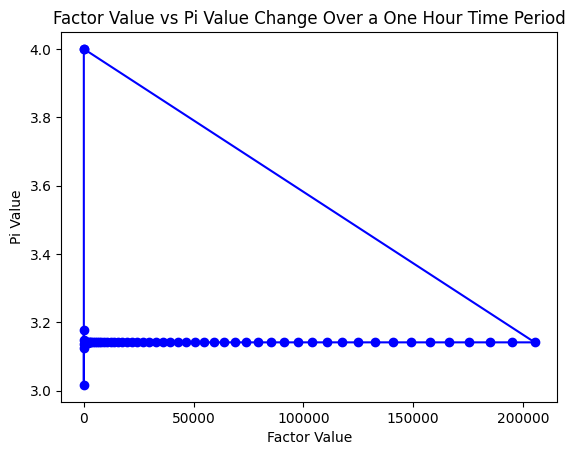

In [31]:
#use matplotlib to create a plot of the data - pull x and y from the dataframe to look for patterns
import sqlite3
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Get data from the SQLite table
cursor.execute("SELECT factor_value, pi_value FROM mytable")
data = cursor.fetchall()

# Separate x and y values
x_values = [row[0] for row in data]
y_values = [row[1] for row in data]

plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Factor Value')
plt.ylabel('Pi Value')
plt.title('Factor Value vs Pi Value Change Over a One Hour Time Period')

plt.show()


This graph displays the relationship between factor values and corresponding pi values pulled from the api over a one hour time period. Interestingly, the plot forms a right triangular shape, suggesting a potential mathematical relationship between the two variables. The factor values are plotted along the x-axis, while the pi values are plotted along the y-axis.  